# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image? (num examples,width,height,channels)
image_shape = np.shape(X_train)[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples = ",n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples =  4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

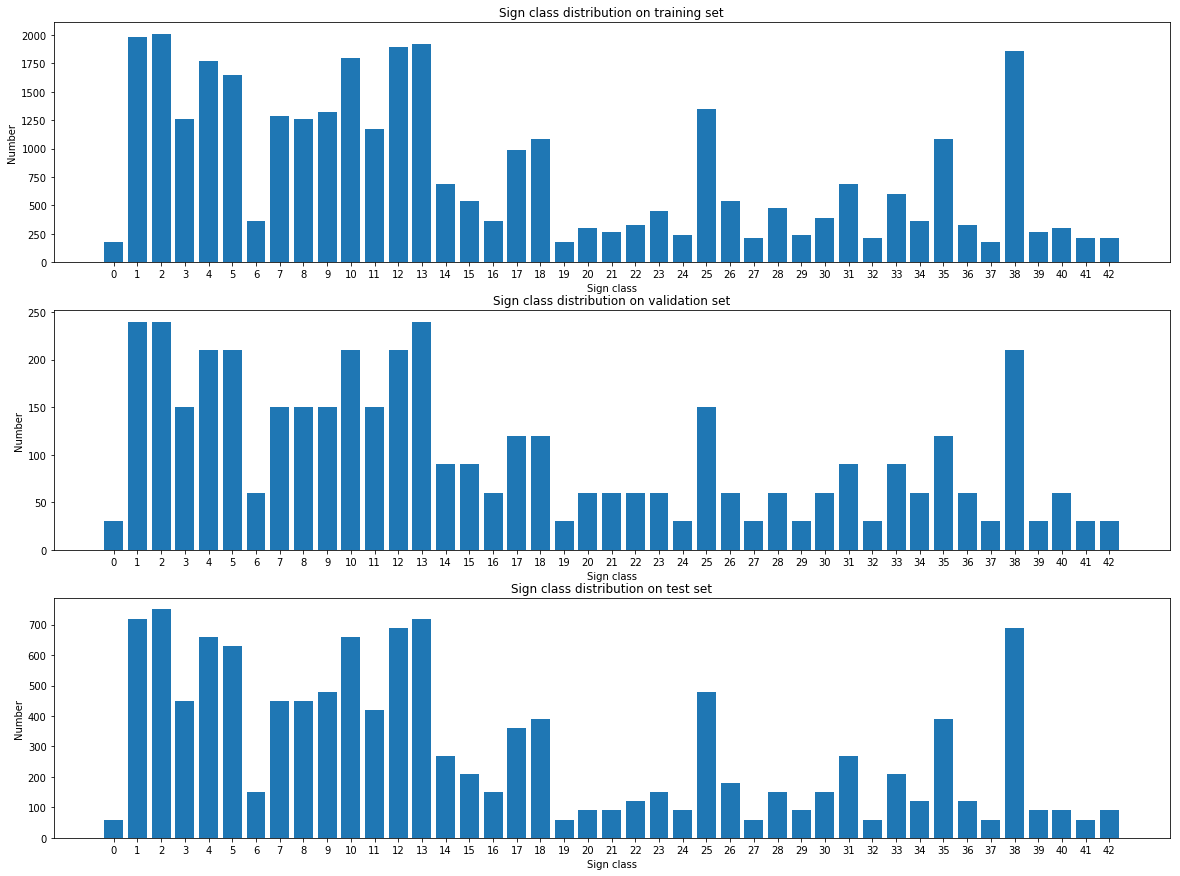

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# find the unique elements of y_train
signs = np.unique(y_train)

# count the number of signs
sign_count_train = {}
sign_count_valid = {}
sign_count_test = {}
for sign in signs:
    mask = (y_train == sign)
    mask_valid = (y_valid == sign)
    mask_test = (y_test == sign)
    sign_count_train[sign] = np.size(y_train[mask])
    sign_count_valid[sign] = np.size(y_valid[mask_valid])
    sign_count_test[sign] = np.size(y_test[mask_test])

# show the numbers of each sign class
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
plt.bar(signs,[sign_count_train.get(key) for key in signs],width=0.8,align = 'center')
plt.title('Sign class distribution on training set')
plt.xlabel('Sign class')
plt.ylabel('Number')
plt.xticks(signs)
#plt.show()

plt.subplot(3,1,2)
plt.bar(signs,[sign_count_valid.get(key) for key in signs],width=0.8,align = 'center')
plt.title('Sign class distribution on validation set')
plt.xlabel('Sign class')
plt.ylabel('Number')
plt.xticks(signs)
#plt.show()

plt.subplot(3,1,3)
plt.bar(signs,[sign_count_test.get(key) for key in signs],width=0.8,align = 'center')
plt.title('Sign class distribution on test set')
plt.xlabel('Sign class')
plt.ylabel('Number')
plt.xticks(signs)
plt.show()
    

In [4]:
import pandas as pd

# show the sign names
df = pd.read_csv("signnames.csv")
df.insert(2,'Numbers of training set',sign_count_train.values())
df.insert(3,'Numbers of validation set',sign_count_valid.values())
df.insert(4,'Numbers of test set',sign_count_test.values())

df.describe()

,ClassId,Numbers of training set,Numbers of validation set,Numbers of test set
count,43.000000,43.000000,43.000000,43.000000
mean,21.000000,809.279070,102.558140,293.720930
std,12.556539,626.750855,69.662213,233.442389
min,0.000000,180.000000,30.000000,60.000000
25%,10.500000,285.000000,60.000000,90.000000
50%,21.000000,540.000000,60.000000,180.000000
75%,31.500000,1275.000000,150.000000,450.000000
max,42.000000,2010.000000,240.000000,750.000000


In [5]:
df.head(n_classes)

,ClassId,SignName,Numbers of training set,Numbers of validation set,Numbers of test set
0,0,Speed limit (20km/h),180,30,60
1,1,Speed limit (30km/h),1980,240,720
2,2,Speed limit (50km/h),2010,240,750
3,3,Speed limit (60km/h),1260,150,450
4,4,Speed limit (70km/h),1770,210,660
5,5,Speed limit (80km/h),1650,210,630
6,6,End of speed limit (80km/h),360,60,150
7,7,Speed limit (100km/h),1290,150,450
8,8,Speed limit (120km/h),1260,150,450
9,9,No passing,1320,150,480


[32990, 1253, 11208, 30601, 28847]
ClassId:2,
SignName:Speed limit (50km/h)
ClassId:26,
SignName:Traffic signals
ClassId:9,
SignName:No passing
ClassId:17,
SignName:No entry
ClassId:12,
SignName:Priority road


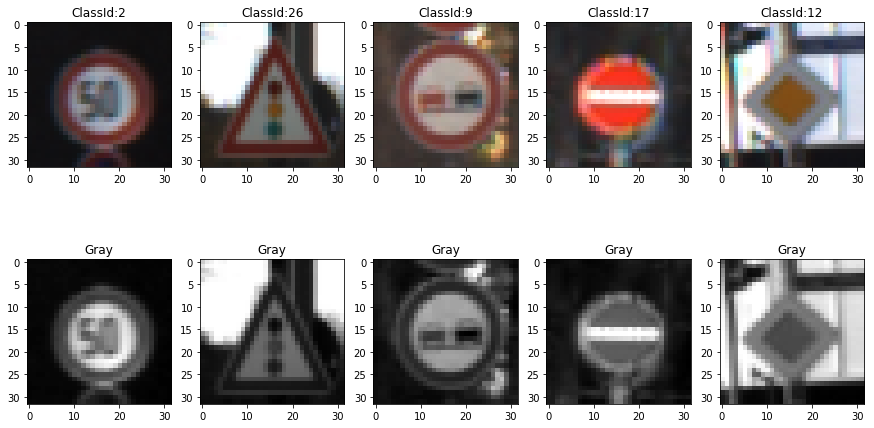

In [6]:
import random
import cv2

#random sampling 
n_samples = 5
samples = random.sample(list(range(n_train)),n_samples)
print (samples)

plt.figure(figsize=(15,8))
for i in range(len(samples)):
    num = samples[i]
    image = X_train[num]
    #get the sign name
    sign = df[df['ClassId'] == y_train[num]]['SignName'].values[0]
    print ("ClassId:{},\nSignName:{}".format(y_train[num],sign))
       
    plt.subplot(2,5,i+1)
    plt.title('ClassId:{}'.format(y_train[num]))
    plt.imshow(image)
    
    # show gray image
    plt.subplot(2,5,i+6)
    img_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    plt.title("Gray")
    plt.imshow(img_gray,'gray')
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.preprocessing import LabelBinarizer

# normalizate the image data
def normalize(x):
    
    return (x - 128) / 128

# one hot encode
def one_hot_encode(x):
    
    signs = np.unique(y_train)
    
    encode = LabelBinarizer().fit(signs)
    
    return encode.transform(x)


In [8]:
# Converting the RGB image to gray image
X_train_gray = np.zeros((n_train,32,32),dtype=np.int32)
X_valid_gray = np.zeros((n_validation,32,32),dtype=np.int32)
X_test_gray = np.zeros((n_test,32,32),dtype=np.int32)

for i in range(n_train):
    X_train_gray[i] = cv2.cvtColor(X_train[i],cv2.COLOR_RGB2GRAY)
    
for i in range(n_validation):
    X_valid_gray[i] = cv2.cvtColor(X_valid[i],cv2.COLOR_RGB2GRAY)
    
for i in range(n_test):
    X_test_gray[i] = cv2.cvtColor(X_test[i],cv2.COLOR_RGB2GRAY)
    
# change the shape of image to (number,width,height,channels) for CNN input 
X_train_gray = np.expand_dims(X_train_gray, axis=3)
X_valid_gray = np.expand_dims(X_valid_gray,axis = 3)
X_test_gray = np.expand_dims(X_test_gray, axis=3)

# normalize the image data
X_train_norm = normalize(X_train_gray)
X_valid_norm = normalize(X_valid_gray)
X_test_norm = normalize(X_test_gray)

# one hot encode for labels
y_train_one = one_hot_encode(y_train)
y_valid_one = one_hot_encode(y_valid)
y_test_one = one_hot_encode(y_test)



### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

#neural net input,shape is (None,width,height,channel)
def neural_net_image_input(image_shape):
    
    return tf.placeholder(tf.float32,shape = (None,)+image_shape,name = 'x')

#neural net label input ,shape is (None,labels)
def neural_net_label_input(n_labels):
       
    return tf.placeholder(tf.int32,shape = [None,n_labels],name = 'y')

# neural net keep_prob for drop out layer,(1 - keep_prob) will be droped out 
def neural_net_keep_prob_input():
    
    return tf.placeholder(tf.float32,name = 'keep_prob')


# convolution and maxpool layer
def conv2d_maxpool(x_tensor,conv_num_outputs,conv_ksize,conv_strides,pool_ksize,pool_strides):
    
    input_num = x_tensor.get_shape().as_list()[-1]
    
    #conv kernel weights and initialization
    kernel_weights = tf.Variable(tf.truncated_normal(conv_ksize + (input_num,conv_num_outputs),mean = 0.0,stddev = 0.05))
    
    # kernel bias initialization
    kernel_bias = tf.Variable(tf.zeros(conv_num_outputs))
    
    # add kernel_weights to graph
    tf.add_to_collection(tf.GraphKeys.WEIGHTS, kernel_weights)
    
    # strides shape
    strides = (1,)+conv_strides +(1,)
    
    #convolution operation
    conv2d = tf.nn.conv2d(x_tensor,kernel_weights,strides,padding = 'VALID')
    
    conv2d_bias = tf.nn.bias_add(conv2d,kernel_bias)
    
    #using relu as the activation
    conv2d_output = tf.nn.relu(conv2d_bias)
    
    #pool size and pool strides size
    psize = (1,)+pool_ksize + (1,)
    pstrides = (1,) + pool_strides + (1,)
    
    #max pool operation
    max_pool_output = tf.nn.max_pool(conv2d_output,psize,pstrides,'VALID')
    
    #output conv2d and conv2d_bias for CNN visulization
    output_  = {'conv2d':conv2d,'conv2d_bias':conv2d_bias,'conv2d_output':conv2d_output,'output':max_pool_output}
    
    return output_

#flatten layer
def flatten(x_tensor):
    
    return tf.contrib.layers.flatten(x_tensor)

#fully connected layer
def fully_conn(x_tensor,num_outputs):
    
    return tf.contrib.layers.fully_connected(x_tensor,num_outputs)

#ouput layer
def output(x_tensor,num_outputs):
    
    return tf.contrib.layers.linear(x_tensor,num_outputs)
    

C:\Users\DELL\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
# build LeNet network
def LeNet(x,keep_prob):
    
    conv1 = conv2d_maxpool(x,16,(5,5),(1,1),(2,2),(2,2))
    
    print (conv1['output'])
    
    conv2 = conv2d_maxpool(conv1['output'],32,(5,5),(1,1),(2,2),(2,2))
    
    print (conv2['output'])
    
    flatten_layer = flatten(conv2['output'])
    
    print (flatten_layer)
    
    fully_layer1 = fully_conn(flatten_layer,256)
    
    print (fully_layer1)
    
    # applay drop out layer
    fully_layer1 = tf.nn.dropout(fully_layer1,keep_prob)

    print (fully_layer1)
    
    fully_layer2 = fully_conn(fully_layer1,128)
    
    print (fully_layer2)
   
    # applay drop out layer
    fully_layer2 = tf.nn.dropout(fully_layer2,keep_prob)
    
    print (fully_layer2)
    
    output_layer = output(fully_layer2,n_classes)
    
    print (output_layer)
    
    output_ = {'conv2d_1':conv1['conv2d'],'conv2d_2':conv2['conv2d'],'output':output_layer}
    
    return output_
    

In [11]:
### Build the Neural Network

#Remove previous weights,bias,inputs,etc...
tf.reset_default_graph()

#Inputs

x = neural_net_image_input((32,32,1))

y = neural_net_label_input(n_classes)

keep_prob = neural_net_keep_prob_input()

# Model
lenet_model = LeNet(x,keep_prob)

logits = lenet_model['output']

# output of lenet covn layers  
lenet_conv1 = lenet_model['conv2d_1']
lenet_conv2 = lenet_model['conv2d_2']


# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits,name = 'logits')

# Loss and Optimizer
regularizer = tf.contrib.layers.l2_regularizer(0.001)
reg_term = tf.contrib.layers.apply_regularization(regularizer)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits,labels = y)) + reg_term
optimizer = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(cost)

#Accuracy
correct_pred = tf.equal(tf.argmax(logits,1),tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred,tf.float32),name = 'accuracy')



Tensor("MaxPool:0", shape=(?, 14, 14, 16), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 5, 5, 32), dtype=float32)
Tensor("Flatten/flatten/Reshape:0", shape=(?, 800), dtype=float32)
Tensor("fully_connected/Relu:0", shape=(?, 256), dtype=float32)
Tensor("dropout/mul:0", shape=(?, 256), dtype=float32)
Tensor("fully_connected_1/Relu:0", shape=(?, 128), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 128), dtype=float32)
Tensor("fully_connected_2/BiasAdd:0", shape=(?, 43), dtype=float32)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [53]:
from sklearn.utils import shuffle

# shuffle the train data set
X_train_norm,y_train_one = shuffle(X_train_norm,y_train_one)

# epochs and batch_size
batch_size = 64
epochs = 30

keep_probability = 0.5

cost_value =[]
accuracy_valid = []
accuracy_train = []

# save the model
saver = tf.train.Saver()

print ('Training start ...')
with tf.Session() as sess:
    
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle   
    for epoch in range(epochs):
                
        for batch_start in range(0,n_train,batch_size):
            
            X_train_n = X_train_norm[batch_start:(batch_start + batch_size)]
            y_train_n = y_train_one[batch_start:(batch_start + batch_size)]
           
            # running optimizer and setting the value of keep_prob to 0.5           
            sess.run(optimizer,feed_dict = {x:X_train_n,y:y_train_n,keep_prob:keep_probability})
            
            # running cost function
            cost_fun = sess.run(cost,feed_dict={x:X_train_n,y:y_train_n,keep_prob:1.0})
            
            # save the cost value
            cost_value.append(cost_fun)                     

        # preparing validation data
        X_valid_n = X_valid_norm
        y_valid_n = y_valid_one
        
        # Calculating the accuracy on the training set and validation set
        accuracy_fun_valid = sess.run(accuracy,feed_dict={x:X_valid_n,y:y_valid_n,keep_prob:1.0})
        accuracy_fun_train = sess.run(accuracy,feed_dict={x:X_train_norm[:n_validation],y:y_train_one[:n_validation],keep_prob:1.0})
        
        accuracy_valid.append(accuracy_fun_valid)
        accuracy_train.append(accuracy_fun_train)
        
        print("Epoch:{}".format(epoch))
        print("Accuracy on validation set :{}".format(accuracy_fun_valid))
        print("Accuracy on training set:{}".format(accuracy_fun_train))
    
    print ("Training end !")
    
    # save model
    saver.save(sess,'model_save/LeNet')
    print ("Model saved !")


Training start ...
Epoch:0
Accuracy on validation set :0.8650793433189392
Accuracy on training set:0.8877550959587097
Epoch:1
Accuracy on validation set :0.9396825432777405
Accuracy on training set:0.9675737023353577
Epoch:2
Accuracy on validation set :0.9523809552192688
Accuracy on training set:0.9809523820877075
Epoch:3
Accuracy on validation set :0.9562358260154724
Accuracy on training set:0.9873015880584717
Epoch:4
Accuracy on validation set :0.9519274234771729
Accuracy on training set:0.9900226593017578
Epoch:5
Accuracy on validation set :0.9625850319862366
Accuracy on training set:0.9929705262184143
Epoch:6
Accuracy on validation set :0.9630385637283325
Accuracy on training set:0.9938775300979614
Epoch:7
Accuracy on validation set :0.9643990993499756
Accuracy on training set:0.9950113296508789
Epoch:8
Accuracy on validation set :0.9553288221359253
Accuracy on training set:0.994557797908783
Epoch:9
Accuracy on validation set :0.9689342379570007
Accuracy on training set:0.996825397

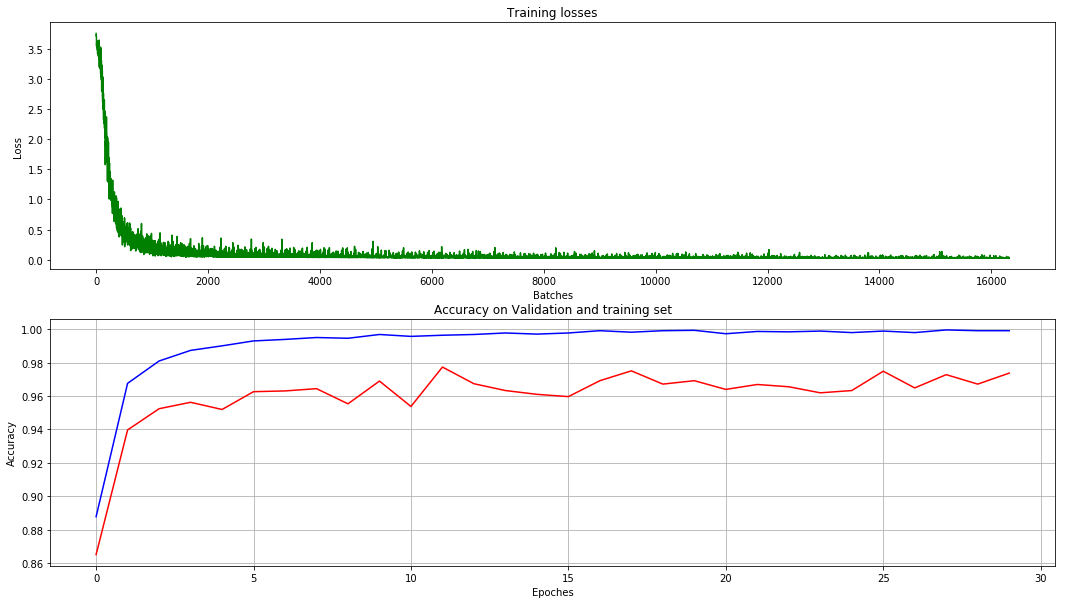

In [54]:
# display the cost value on training set
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.plot(cost_value,'g',label = 'train_losses')
plt.title("Training losses")
plt.xlabel('Batches')
plt.ylabel('Loss')

# display the Accuracy on validation set and training set
plt.subplot(2,1,2)
plt.plot(accuracy_valid,'r',label = 'accuracy_valid')
plt.plot(accuracy_train,'b',label = 'accuracy_train')
plt.grid(True)
plt.title("Accuracy on Validation and training set")
plt.xlabel('Epoches')
plt.ylabel('Accuracy')

plt.show()

In [55]:
# Evaluating the accuracy of the model on the test set
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('model_save/'))
    
    pred = sess.run(accuracy,feed_dict={x:X_test_norm,y:y_test_one,keep_prob:1.0})
        
    print ('Accuracy on Test set:{:.3f}'.format(pred))

INFO:tensorflow:Restoring parameters from model_save/LeNet
Accuracy on Test set:0.955


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

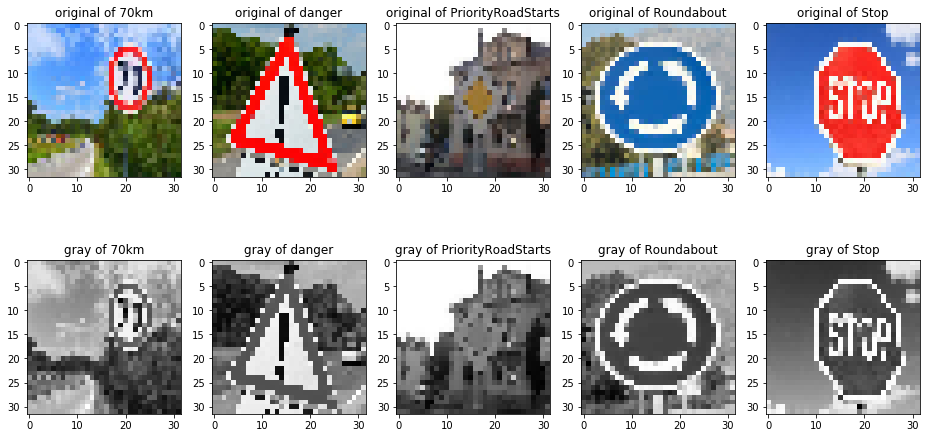

In [67]:
import os
import cv2
import shutil
import matplotlib.image as mpimg
import random
import numpy as np

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# prepare 5 new images for testing
filenames = os.listdir('./testImage/')


test_image_gray = np.zeros((5,32,32),dtype = np.int32)

plt.figure(figsize = (16,8))
i = 0 
for filename in filenames :
    
    # read the image
    img = mpimg.imread('./testImage/{}'.format(filename))
    
    # resize the image 
    img = cv2.resize(img,(32,32))
    
    #convert the image from RGB to GRAY
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    
    test_image_gray[i] = img_gray
    
    # show new images 
    plt.subplot(2,5,i+1)
    plt.title('original of {}'.format(filename.split('.')[0]))
    plt.imshow(img)

    plt.subplot(2,5,i+6)
    plt.title('gray of {}'.format(filename.split('.')[0]))
    plt.imshow(img_gray,'gray')
    
    i = i+1

# change the shape of image to (number,width,height,channels) for CNN input 
test_image_gray = np.expand_dims(test_image_gray, axis=3)

The second,fourth and last images are clear after resizing to 32x32.This matches the input of the model.The first image,the number of red circle is fuzzy after resizing to 32x32.And,the length and width of the image are squeezed.This is difficult for model to classify the sign.The background of the third image is complicated.It is difficult to find the location of the sign.

* The Brightness of the image : All images have good brightness.
* The Contrast of the image :The color of the third image is similar to that of background.Others have good contrast.
* The Angle of the traffic sign:The angle of the traffic sign in the first image and the second image are tilted.Others have good angle.
* Image might be jittered:No image is jittered
* Background Objects:The The background of these five images are trees,sky,road and trees,sky and road,sky and house.
* Multiple Signs in one image:The third image has three signs.Others have only one sign.

### Predict the Sign Type for Each Image

In [76]:
# normalize the new images
test_image_norm = normalize(test_image_gray)

# load the model
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('model_save/'))
    
    #get the max value of the logits output
    prediction = tf.argmax(logits,1)
    
    pred_eval = prediction.eval(feed_dict={x:test_image_norm,keep_prob:1.0})

    print ("The predictions of the new images are: ",pred_eval)
    
    for i in range(len(pred_eval)):
        
        sign = df[df['ClassId'] == pred_eval[i]]['SignName'].values[0]
        print (sign)    
    

INFO:tensorflow:Restoring parameters from model_save/LeNet
The predictions of the new images are:  [ 1 18 26 40 14]
Speed limit (30km/h)
General caution
Traffic signals
Roundabout mandatory
Stop


### Analyze Performance

Here are the results of the prediction:

Image | Pediction |
------| ----------|
Speed limit (70km/h) | Speed limit(30km/h)
General caution | General caution |
Priority road | Traffic signals | 
Roundabout | Roundabout |
Stop | Stop |



For the first image,the model pridect it to be the Speed limit (30km/h).But,it's actually a Speed limit (70km/h) sign.For the third image,the model pridect it to be the Traffic signals.But,it's actually a Priority road sign.The results of model prediction for other images are correct.

The model was able to correctly guess 3 of the 5 traffic signs,which gives an accuracy of 0.6.

In [77]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print ('The accuracy for these 5 new images is :{}'.format(3./5))

The accuracy for these 5 new images is :0.6


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [78]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess,tf.train.latest_checkpoint('model_save/'))
    
    #calcuate the softmax value of logits
    prediction = tf.nn.softmax(logits)
    
    # get the 5 largest probabilites 
    pred_top_5 = tf.nn.top_k(prediction,5)
    
    pred_eval = sess.run(pred_top_5,feed_dict={x:test_image_norm,keep_prob:1.0})
    
    print (pred_eval)
    

INFO:tensorflow:Restoring parameters from model_save/LeNet
TopKV2(values=array([[9.99851108e-01, 1.17935786e-04, 2.39453766e-05, 3.95388361e-06,
        9.89887781e-07],
       [1.00000000e+00, 2.91723378e-13, 1.29422081e-13, 1.46570813e-17,
        1.10716540e-22],
       [3.80497158e-01, 2.00061888e-01, 1.33272156e-01, 8.28661397e-02,
        5.18221743e-02],
       [1.00000000e+00, 1.31664724e-09, 1.42652027e-11, 6.06779167e-13,
        2.69277710e-13],
       [1.00000000e+00, 2.63421368e-10, 1.72423295e-12, 3.17967603e-13,
        1.84410985e-13]], dtype=float32), indices=array([[ 1, 37, 40, 11, 26],
       [18, 27, 26, 11,  1],
       [26, 25, 38, 11, 18],
       [40,  7, 12, 16, 41],
       [14, 17, 38, 12, 13]]))


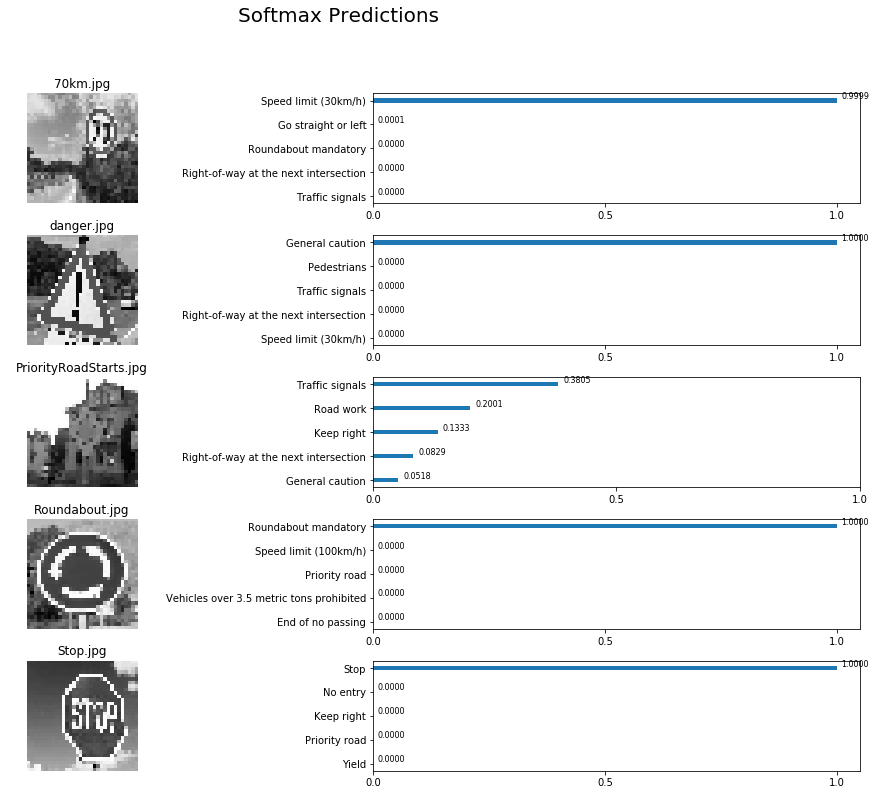

In [79]:
def display_image_predictions(features, labels, predictions):

    label_ids = labels
    label_names = df['SignName'].values
    image_names = filenames
    
    
    fig, axies = plt.subplots(nrows=5, ncols=2,figsize=(15,10))
    fig.tight_layout()
    fig.suptitle('Softmax Predictions', fontsize=20, y=1.1)

    n_predictions = 5
    margin = 0.05
    ind = np.arange(n_predictions)
    width = (1. - 2. * margin) / n_predictions

    for image_i, (feature, label_id, pred_indicies, pred_values) in enumerate(zip(features, label_ids, predictions.indices, predictions.values)):
        pred_names = [label_names[pred_i] for pred_i in pred_indicies]
        correct_name = image_names[label_id]       

                
        axies[image_i][0].imshow(feature.reshape(32,32),'gray')
        axies[image_i][0].set_title(correct_name)
        axies[image_i][0].set_axis_off()

        axies[image_i][1].barh(ind + margin, pred_values[::-1], width)
        axies[image_i][1].set_yticks(ind + margin)
        axies[image_i][1].set_yticklabels(pred_names[::-1])
        axies[image_i][1].set_xticks([0, 0.5, 1.0])
        
        for score ,pos in zip(pred_values[::-1],ind+margin):
            axies[image_i][1].text(score+margin/n_predictions,pos,'%.4f'%score,va = 'bottom',fontsize =8)

#display the top 3 probabilities of the new images      
display_image_predictions(test_image_gray,df['ClassId'].values,pred_eval)

* For the second,fourth and last images,the model are very sure of its prediction.And the predictions of the model are true.
* Although its prediction of the first image is relatively sure,it's wrong.
* For the third image,the model is not very sure that this is a Traffic signals(probability of 0.38).But,it's actually a Priority road sign.The top five soft max probabilities are:

Prodiction | Probability |
-----------|-------------|
Traffic signals | 0.3805 |
Road work | 0.2001 |
Keep right | 0.1333 |
Right-of-way at the next intersection | 0.0829 |
General caution | 0.0518 |

For the third image ,the max probability  is 0.3805,less then 0.5.So,the prediction result of the model is not to be trusted.


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [72]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input,keep_prob:1.0})
    
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

INFO:tensorflow:Restoring parameters from model_save/LeNet


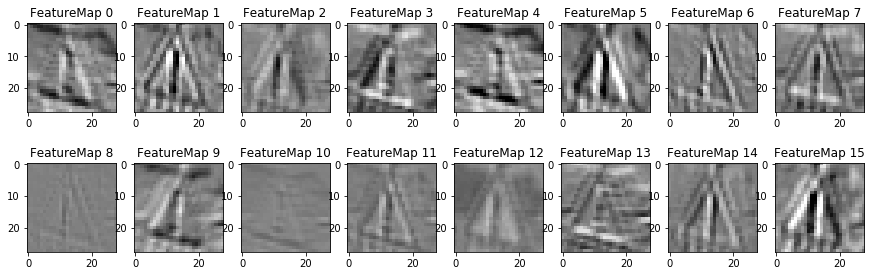

In [75]:
input_image = test_image_norm[1]
input_image = np.expand_dims(input_image,axis = 0)


with tf.Session() as sess:
    
    saver.restore(sess,tf.train.latest_checkpoint('model_save/'))
    
    #visualize the first convolution layer of LeNet
    activation = lenet_conv1
    
    outputFeatureMap(input_image,activation,activation_min = -2,activation_max = 2,plt_num = 1)